In [1]:
#Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [2]:
#File Paths
mouseDrugData = "mouseData.csv"
clinicalDrugData = "clinicalData.csv"

In [3]:
#Read into dataframes
dfMouseDrugData = pd.read_csv(mouseDrugData)
dfClinicalDrugData = pd.read_csv(clinicalDrugData)

dfClinicalDrugData.head()
dfMouseDrugData.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
#Left-merging the data into a single dataframe
dfTotalData = pd.merge(dfClinicalDrugData, dfMouseDrugData, on="Mouse ID", how="left")
dfTotalData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [5]:
#Setting up a dataframe to view avg tumor growth over time per treatment.
dfDrugSortedData = dfTotalData.groupby(['Drug','Timepoint'])
dfDrugSortedData.head()

dfTumorVolumeByDrug = pd.DataFrame(dfDrugSortedData.mean()["Tumor Volume (mm3)"])
dfTumorVolumeByDrug.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
#Finding the standard error
dfTumorStandardError = pd.DataFrame(dfDrugSortedData.sem()["Tumor Volume (mm3)"])
dfTumorStandardError = dfTumorStandardError.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Standard Error"})
dfTumorStandardError.head()

Tumor Volume Standard Error
Drug      Timepoint                             
Capomulin 0                             0.000000
          5                             0.448593
          10                            0.702684
          15                            0.838617
          20                            0.909731

In [7]:
#Turning the dataframe into a pivot table. For some reason, it wouldn't work unless I reset the index
#However, resetting the index twice means that it'll print an error. Some exception handeling to deal with this.

try:
    dfTumorVolumeByDrug = dfTumorVolumeByDrug.reset_index()
except ValueError:
    print("Index was already reset!")
    
tumorVolumeByDrugTable = dfTumorVolumeByDrug.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
tumorVolumeByDrugTable




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [8]:
#Second verse, same as the first for standard error dataframe.
#Turning the dataframe into a pivot table. For some reason, it wouldn't work unless I reset the index
#However, resetting the index twice means that it'll print an error. Some exception handeling to deal with this.

try:
    dfTumorStandardError = dfTumorStandardError.reset_index()
except ValueError:
    print("Index was already reset!")
    
tumorStandardErrorTable = dfTumorStandardError.pivot(index="Timepoint", columns="Drug", values="Tumor Volume Standard Error")
tumorStandardErrorTable

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [9]:
#We are only interested in a few of the drugs, drop the ones we don't want

finalTumorTable = tumorVolumeByDrugTable.drop(columns=["Ceftamin",
                                                       "Naftisol",
                                                       "Propriva",
                                                       "Ramicane",
                                                       "Stelasyn",
                                                       "Zoniferol"])

finalStandarErrorTable = tumorStandardErrorTable.drop(columns=["Ceftamin", 
                                                               "Naftisol",
                                                               "Propriva",
                                                               "Ramicane",
                                                               "Stelasyn",
                                                               "Zoniferol"])


In [10]:
#Now that we have our data, time to set up axis and datapoints for our graphs.

xAxis = finalTumorTable.index.values

yAxisCapomulin = [i for i in finalTumorTable["Capomulin"]]
yAxisInfubinol = [i for i in finalTumorTable["Infubinol"]]
yAxisKetapril = [i for i in finalTumorTable["Ketapril"]]
yAxisPlacebo = [i for i in finalTumorTable["Placebo"]]

capomulinStandardError = finalStandarErrorTable["Capomulin"].tolist()
infubinolStandardError = finalStandarErrorTable["Infubinol"].tolist()
ketaprilStandardError = finalStandarErrorTable["Ketapril"].tolist()
placeboStandardError = finalStandarErrorTable["Placebo"].tolist()


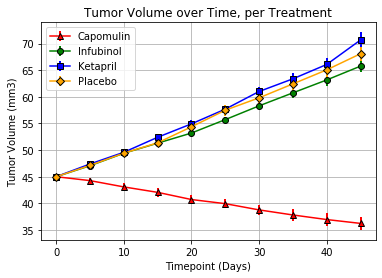

In [11]:
#With our axis set up, draw and label the plot

fig, errorSubplot = plt.subplots()
errorSubplot.errorbar(xAxis, yAxisCapomulin, yerr=capomulinStandardError,
                      linestyle="-", color="Red", elinewidth=2, marker="^",
                      markeredgecolor="Black", label = "Capomulin")

errorSubplot.errorbar(xAxis, yAxisInfubinol, yerr=infubinolStandardError, 
                      linestyle="-", color="Green", elinewidth=2, marker="o",
                      markeredgecolor="Black", label = "Infubinol")

errorSubplot.errorbar(xAxis, yAxisKetapril, yerr=ketaprilStandardError
                      , linestyle="-", color="Blue", elinewidth=2, marker="s",
                      markeredgecolor="Black", label = "Ketapril")

errorSubplot.errorbar(xAxis, yAxisPlacebo, yerr=placeboStandardError, linestyle="-",
                      color="Orange", elinewidth=2, marker="D",
                      markeredgecolor="Black", label = "Placebo")

errorSubplot.grid()

errorSubplot.set_xlabel("Timepoint (Days)")
errorSubplot.set_ylabel("Tumor Volume (mm3)")

errorSubplot.set_title("Tumor Volume over Time, per Treatment")

plt.legend(loc="upper left")

plt.savefig("graphs/Tumor Volume over Time, per Treatment")

plt.show()


In [12]:
#Time to start working with the metastatic data. Process is pretty similar to above.
dfMetastaticSiteAvg = pd.DataFrame(dfDrugSortedData.mean()["Metastatic Sites"])
dfMetastaticSiteAvg.head()

dfMetaStaticStdErr = pd.DataFrame(dfDrugSortedData.sem()["Metastatic Sites"])
dfMetaStaticStdErr.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
try:
    dfMetastaticSiteAvg = dfMetastaticSiteAvg.reset_index()
except ValueError:
    print("Index was already reset!")

metastaticSiteAvgTable = dfMetastaticSiteAvg.pivot(index="Timepoint", 
                                                   columns="Drug", 
                                                   values="Metastatic Sites")

metastaticSiteAvgTable

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [14]:
finalMetastaticSiteTable = metastaticSiteAvgTable.drop(columns=["Ceftamin",
                                                                "Naftisol",
                                                                "Propriva",
                                                                "Ramicane",
                                                                "Stelasyn",
                                                                "Zoniferol"])
finalMetastaticSiteTable

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [15]:
try:
    dfMetaStaticStdErr = dfMetaStaticStdErr.reset_index()
except ValueError:
    print("Index was already reset!")
    
metastaticStdErrTable = dfMetaStaticStdErr.pivot(index="Timepoint", 
                                                   columns="Drug", 
                                                   values="Metastatic Sites")

finalMetastaticStdErrTable = metastaticStdErrTable.drop(columns=["Ceftamin",
                                                                 "Naftisol",
                                                                 "Propriva",
                                                                 "Ramicane",
                                                                 "Stelasyn",
                                                                 "Zoniferol"])
finalMetastaticStdErrTable

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


In [16]:

xAxis = finalTumorTable.index.values

yAxisCapomulin = [i for i in finalMetastaticSiteTable["Capomulin"]]
yAxisInfubinol = [i for i in finalMetastaticSiteTable["Infubinol"]]
yAxisKetapril = [i for i in finalMetastaticSiteTable["Ketapril"]]
yAxisPlacebo = [i for i in finalMetastaticSiteTable["Placebo"]]

capomulinStandardError = finalMetastaticStdErrTable["Capomulin"].tolist()
infubinolStandardError = finalMetastaticStdErrTable["Infubinol"].tolist()
ketaprilStandardError = finalMetastaticStdErrTable["Ketapril"].tolist()
placeboStandardError = finalMetastaticStdErrTable["Placebo"].tolist()


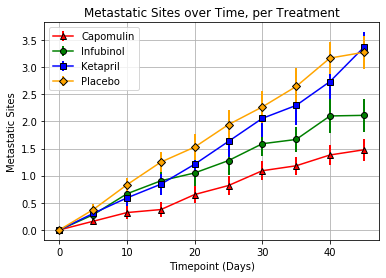

In [17]:
fig, errorSubplot = plt.subplots()
errorSubplot.errorbar(xAxis, yAxisCapomulin, yerr=capomulinStandardError,
                      linestyle="-", color="Red", elinewidth=2, marker="^",
                      markeredgecolor="Black", label = "Capomulin")

errorSubplot.errorbar(xAxis, yAxisInfubinol, yerr=infubinolStandardError, 
                      linestyle="-", color="Green", elinewidth=2, marker="o",
                      markeredgecolor="Black", label = "Infubinol")

errorSubplot.errorbar(xAxis, yAxisKetapril, yerr=ketaprilStandardError
                      , linestyle="-", color="Blue", elinewidth=2, marker="s",
                      markeredgecolor="Black", label = "Ketapril")

errorSubplot.errorbar(xAxis, yAxisPlacebo, yerr=placeboStandardError, linestyle="-",
                      color="Orange", elinewidth=2, marker="D",
                      markeredgecolor="Black", label = "Placebo")

errorSubplot.grid()

errorSubplot.set_xlabel("Timepoint (Days)")
errorSubplot.set_ylabel("Metastatic Sites")

errorSubplot.set_title("Metastatic Sites over Time, per Treatment")

plt.legend(loc="upper left")

plt.savefig("graphs/Metastatic Sites over Time, per Treatment")

plt.show()


In [18]:
#The mouse count is going to be much the same as the previous two sections

In [19]:
dfMouseCount = pd.DataFrame(dfDrugSortedData.count()["Mouse ID"])
dfMouseCount.head()

dfMouseCount = dfMouseCount.rename(columns={"Mouse ID" : "Number of Mice"})

In [20]:
try:
    dfMouseCount = dfMouseCount.reset_index()
except ValueError:
    print("Index was already reset!")

mouseCountTable = dfMouseCount.pivot(index="Timepoint", columns="Drug", values="Number of Mice")
mouseCountTable

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [21]:
#Dropping the usual subjects
finalMouseCountTable = mouseCountTable.drop(columns=["Ceftamin",
                                                     "Naftisol",
                                                     "Propriva",
                                                     "Ramicane",
                                                     "Stelasyn",
                                                     "Zoniferol"])

In [22]:
survivalRateTable = (finalMouseCountTable/25)*100
survivalRateTable

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


In [23]:
xAxis = survivalRateTable.index.values

yAxisCapomulin = [i for i in survivalRateTable["Capomulin"]]
yAxisInfubinol = [i for i in survivalRateTable["Infubinol"]]
yAxisKetapril = [i for i in survivalRateTable["Ketapril"]]
yAxisPlacebo = [i for i in survivalRateTable["Placebo"]]

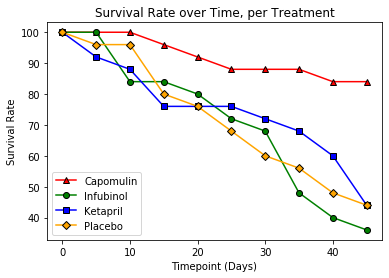

In [24]:
#No subplot needed, this time
plt.plot(xAxis, yAxisCapomulin, linestyle="-", color="Red", 
         marker="^", markeredgecolor="Black", label = "Capomulin")

plt.plot(xAxis, yAxisInfubinol, linestyle="-", color="Green",
         marker="o", markeredgecolor="Black", label = "Infubinol")

plt.plot(xAxis, yAxisKetapril, linestyle="-", color="Blue",
         marker="s", markeredgecolor="Black", label = "Ketapril")

plt.plot(xAxis, yAxisPlacebo, linestyle="-", color="Orange", 
         marker="D", markeredgecolor="Black", label = "Placebo")

plt.xlabel("Timepoint (Days)")
plt.ylabel("Survival Rate")

plt.title("Survival Rate over Time, per Treatment")

plt.legend(loc="lower left")

plt.savefig("graphs/Survival Rate over Time, per Treatment")

plt.show()


In [25]:
#Calculating the percent difference for each drug, and pushing it into a dataframe
percentDifference = pd.DataFrame((finalTumorTable.iloc[9,:]-finalTumorTable.iloc[0,:])*100/finalTumorTable.iloc[0,:])
percentDifference = percentDifference.rename(columns={0 : "Tumor Change in Percent"})
percentDifference

,Tumor Change in Percent
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


In [26]:
#Setting X axis
xAxis=percentDifference.index.values
yAxis=percentDifference["Tumor Change in Percent"]

percentDifference["Positive Change?"] = percentDifference["Tumor Change in Percent"] > 0


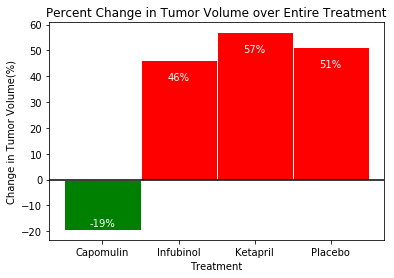

In [27]:
fig, subplot = plt.subplots()

treatmentNames = [name for name in range(len(xAxis))]
subplot.set_xticks(treatmentNames)

plt.hlines(0,-0.75,len(xAxis))

graph = subplot.bar(xAxis,yAxis, align="center",width=1, linewidth=1, edgecolor="white",
            color=percentDifference["Positive Change?"].map({True: 'red', False: 'green'}))

subplot.set_ylabel("Change in Tumor Volume(%)")
subplot.set_xlabel("Treatment")

#Autolabel function, stolen from the tutorial linked in the hw assignment, though lightly modified to put
# the label squarely inside of the bar graph, use white text, and print a % after the number
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.1)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+"%",
                ha='center', va='bottom', color = 'white')

autolabel(graph, subplot)

subplot.set_title("Percent Change in Tumor Volume over Entire Treatment")

plt.savefig("graphs/Percent Change in Tumor Volume over Entire Treatment")

plt.show()


# Observations
## Observation 1
    Overall, most of the treatements seemed to be limited in their effectiveness in reducing
    tumor volume. As shown in the graph, "Tumor Volume over Time, per Treatment" we can see that
    only Capomulin succeded in reducing the tumor volume at all, whereas Ketapril increased tumor
    growth relative to the placebo, and Infubinol only managed to slow it.
## Observation 2
    As can be seen in the graph "Metastatic Sites over Time, per Treatment", Capomulin had the
    most success in reducing the number of metastatic sites, which is expected since it was also
    the best at reducing the tumor volume. However, Infubinol also appeared to be effective in
    reducing the number of sites. By the end of the study, there was no appreciable difference
    between Ketapril and the placebo. The combination of these two observations leads me to 
    doubt Ketapril's effectiveness.
## Observation 3
    The final graph, "Survival Rate over Time, per Treatment", continues the trends we have seen
    up until now. Ketapril continues to perform no better than the placebo, while Capomulin leads
    the treatments with the highest survival rate out of the group, followed by Infubinol. As a
    combination of these observations, I would conclude that Capomulin is the most effective drug
    in this group, followed by Infubinol. Ketapril seems to be either neutral or harmful relative
    to the placebo.